In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve


from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Features/Data 2/Train/combined_data.csv')
df.head()

,SampleName,label,A,C,D,E,F,G,H,I,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
0,IKDNFIRF,1,0.000000,0.000000,0.125,0.000000,0.250000,0.000000,0.000000,0.25,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,QERRAMGFVGMR,1,0.083333,0.000000,0.000,0.083333,0.083333,0.166667,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,APVSTGAGGGTVLAKMYPRGSHWAVGHLM,1,0.137931,0.000000,0.000,0.000000,0.000000,0.206897,0.068966,0.00,...,0.0,0.0,0.035714,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,MRCYFLTGLAKLQS,0,0.071429,0.071429,0.000,0.000000,0.071429,0.071429,0.000000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,SYSMEHFRWGKPVGRKRRPVKVYTSNGVEEESAEVFPGEM,1,0.025000,0.000000,0.000,0.150000,0.050000,0.100000,0.025000,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.025641,0.025641,0.0,0.0,0.0


In [3]:
df.shape

(13188, 1017)

In [4]:
# Checking for duplicate rows
df.duplicated().sum()

5185

In [5]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(8003, 1017)

In [7]:
df2 = df.copy()

# check the min and max length of the sequences
df2['length'] = df2['SampleName'].apply(lambda x: len(x))
print('Max length:', df2['length'].max())
print('Min length:', df2['length'].min())

Max length: 99
Min length: 6


In [8]:
df['label'].value_counts()

label
0    4019
1    3984
Name: count, dtype: int64

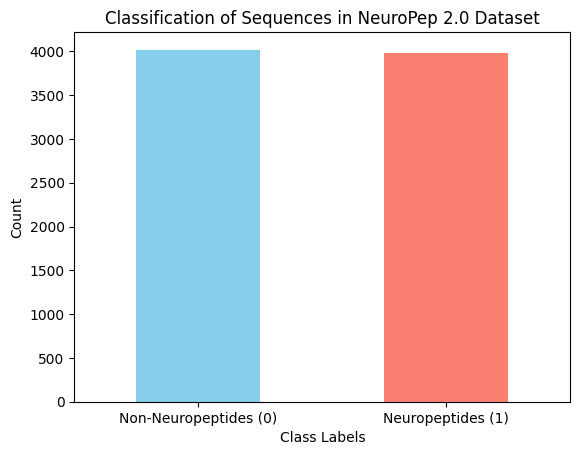

In [9]:
import matplotlib.pyplot as plt

# Plotting the value counts for the 'label' column
df['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding a title and labels
plt.title('Classification of Sequences in NeuroPep 2.0 Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Count')

# Setting custom x-axis tick labels with horizontal orientation
plt.xticks(ticks=[0, 1], labels=['Non-Neuropeptides (0)', 'Neuropeptides (1)'], rotation=0)

# Show the plot
plt.show()

In [10]:
# Checking for missing values
df.isnull().sum()

SampleName    0
label         0
A             0
C             0
D             0
             ..
YS_DPC        0
YT_DPC        0
YV_DPC        0
YW_DPC        0
YY_DPC        0
Length: 1017, dtype: int64

In [11]:
# print the columns with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

[]


In [12]:
# checking column distribution
df.describe()

,label,A,C,D,E,F,G,H,I,K,...,YM_DPC,YN_DPC,YP_DPC,YQ_DPC,YR_DPC,YS_DPC,YT_DPC,YV_DPC,YW_DPC,YY_DPC
count,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,...,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000,8003.000000
mean,0.497813,0.064818,0.025003,0.044479,0.046122,0.061330,0.079256,0.022497,0.044674,0.048706,...,0.000631,0.001513,0.001827,0.001086,0.001501,0.003480,0.001256,0.001515,0.000450,0.001107
std,0.500026,0.068911,0.051578,0.056373,0.061856,0.068261,0.081311,0.040355,0.056081,0.061798,...,0.007458,0.010818,0.012032,0.008145,0.009970,0.017567,0.009220,0.010250,0.005369,0.009267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.055556,0.000000,0.025641,0.020202,0.050000,0.064516,0.000000,0.025641,0.027778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.104957,0.022727,0.076923,0.076923,0.100000,0.116279,0.035191,0.076923,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.571429,0.400000,0.500000,0.583333,0.750000,0.833333,0.444444,0.375000,0.611111,...,0.200000,0.200000,0.200000,0.142857,0.166667,0.200000,0.222222,0.200000,0.142857,0.222222


In [13]:
# print the data types
df.dtypes

SampleName     object
label           int64
A             float64
C             float64
D             float64
               ...   
YS_DPC        float64
YT_DPC        float64
YV_DPC        float64
YW_DPC        float64
YY_DPC        float64
Length: 1017, dtype: object

# Model Building

In [ ]:
X = df.drop(['SampleName','label'], axis=1)
y = df['label']

# standardising the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DEEP LEARNING

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# import the required libraries for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Conv1D,MaxPooling1D
from keras import backend as K

# from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

In [18]:
import tensorflow as tf

def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1_val

In [19]:
def matthews_correlation_coefficient(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_pred = tf.keras.backend.round(y_pred)
    
    TP = tf.keras.backend.sum(y_true * y_pred)
    TN = tf.keras.backend.sum((1 - y_true) * (1 - y_pred))
    FP = tf.keras.backend.sum((1 - y_true) * y_pred)
    FN = tf.keras.backend.sum(y_true * (1 - y_pred))
    
    numerator = (TP * TN) - (FP * FN)
    denominator = tf.keras.backend.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) + tf.keras.backend.epsilon())
    
    return tf.where(tf.equal(denominator, 0), tf.constant(0.0), numerator / denominator)

In [20]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.AUC(name="auc"),
    matthews_correlation_coefficient,
]

2024-11-05 13:26:17.970985: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-05 13:26:17.971019: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-05 13:26:17.971028: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-05 13:26:17.971211: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-05 13:26:17.971229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
X_train.shape

(6402, 1015)

# CNN as a Feature Extractor + Machine Learning Model

In [22]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [85]:
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [86]:
cnn_model = Sequential()

cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv1D(128, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv1D(256, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Conv1D(512, kernel_size=3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.5))

cnn_model.add(Flatten())

In [87]:
cnn_layers = []

for layer in cnn_model.layers:
    cnn_layers.append(layer.name)

cnn_layers 

['conv1d_3',
 'batch_normalization_5',
 'max_pooling1d_3',
 'dropout_5',
 'conv1d_4',
 'batch_normalization_6',
 'max_pooling1d_4',
 'dropout_6',
 'conv1d_5',
 'batch_normalization_7',
 'max_pooling1d_5',
 'dropout_7',
 'conv1d_6',
 'batch_normalization_8',
 'max_pooling1d_6',
 'dropout_8',
 'flatten_1']

In [88]:
weights = cnn_model.layers[0].get_weights()[0]
biases = cnn_model.layers[0].get_weights()[1]

weights.shape, biases.shape

((3, 1, 64), (64,))

In [89]:
feature_extractor = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[-1].output)

In [90]:
X_train_features = feature_extractor.predict(X_train_cnn)
X_test_features = feature_extractor.predict(X_test_cnn)

201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


### CNN + Logistic Regression

In [91]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_features, y_train)

LogisticRegression(max_iter=1000)

In [92]:
y_pred = logistic_model.predict(X_test_features)
accuracy_cnn_lr = accuracy_score(y_test, y_pred)
precision_cnn_lr = precision_score(y_test, y_pred)
recall_cnn_lr = recall_score(y_test, y_pred)
f1_cnn_lr = f1_score(y_test, y_pred)
mathews_cnn_lr = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_lr = roc_auc_score(y_test, y_pred)

In [93]:
print("Logistic Regression Accuracy:", accuracy_cnn_lr)
print("Logistic Regression Precision:", precision_cnn_lr)
print("Logistic Regression Recall:", recall_cnn_lr)
print("Logistic Regression F1 Score:", f1_cnn_lr)
print("Logistic Regression Mathews Correlation Coefficient:", mathews_cnn_lr)
print("Logistic Regression ROC AUC Score:", roc_auc_cnn_lr)

Logistic Regression Accuracy: 0.8900687070580887
Logistic Regression Precision: 0.8748481166464156
Logistic Regression Recall: 0.9079445145018915
Logistic Regression F1 Score: tf.Tensor(0.8910891, shape=(), dtype=float32)
Logistic Regression Mathews Correlation Coefficient: 0.780743476546355
Logistic Regression ROC AUC Score: 0.8902346334885695


In [94]:
classificationReport_cnn_lr = classification_report(y_test, y_pred)
print(classificationReport_cnn_lr)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       808
           1       0.87      0.91      0.89       793

    accuracy                           0.89      1601
   macro avg       0.89      0.89      0.89      1601
weighted avg       0.89      0.89      0.89      1601



In [95]:
conf_matrix_cnn_lr = confusion_matrix(y_test, y_pred)

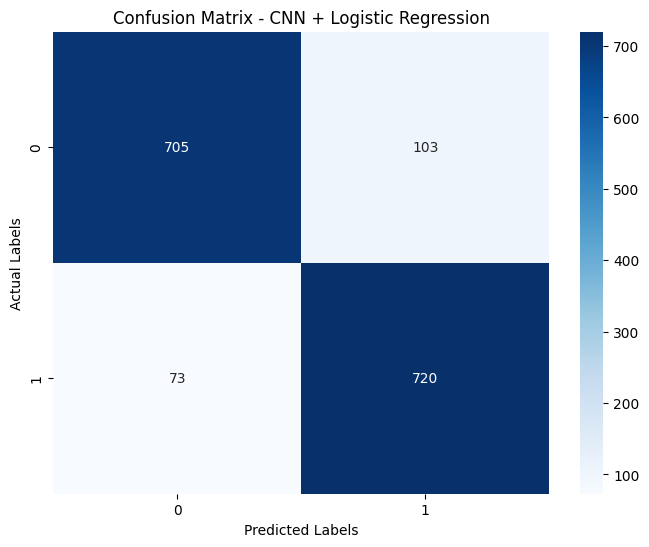

In [96]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Logistic Regression')
plt.show()

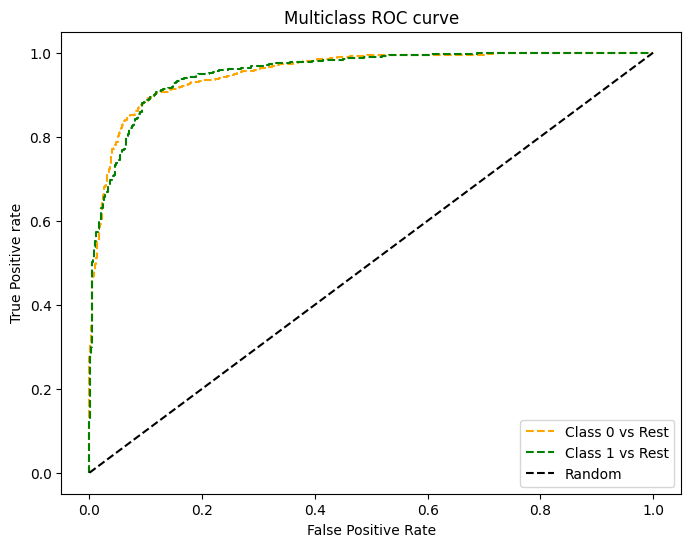

In [97]:
y_pred_proba = logistic_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")

plt.show()

### CNN + SVM

In [98]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_features, y_train)

SVC(probability=True)

In [99]:
y_pred = svm_model.predict(X_test_features)

In [100]:
accuracy_cnn_svm = accuracy_score(y_test, y_pred)
precision_cnn_svm = precision_score(y_test, y_pred)
recall_cnn_svm = recall_score(y_test, y_pred)
f1_cnn_svm = f1_score(y_test, y_pred)
mathews_cnn_svm = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_svm = roc_auc_score(y_test, y_pred)

In [101]:
print("SVM Accuracy:", accuracy_cnn_svm)
print("SVM Precision:", precision_cnn_svm)
print("SVM Recall:", recall_cnn_svm)
print("SVM F1 Score:", f1_cnn_svm)
print("SVM Mathews Correlation Coefficient:", mathews_cnn_svm)
print("SVM ROC AUC Score:", roc_auc_cnn_svm)

SVM Accuracy: 0.8788257339163024
SVM Precision: 0.8527679623085983
SVM Recall: 0.9129886506935687
SVM F1 Score: tf.Tensor(0.8818514, shape=(), dtype=float32)
SVM Mathews Correlation Coefficient: 0.7596479381323252
SVM ROC AUC Score: 0.8791428401982695


In [102]:
classificationReport_cnn_svm = classification_report(y_test, y_pred)
print(classificationReport_cnn_svm)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       808
           1       0.85      0.91      0.88       793

    accuracy                           0.88      1601
   macro avg       0.88      0.88      0.88      1601
weighted avg       0.88      0.88      0.88      1601



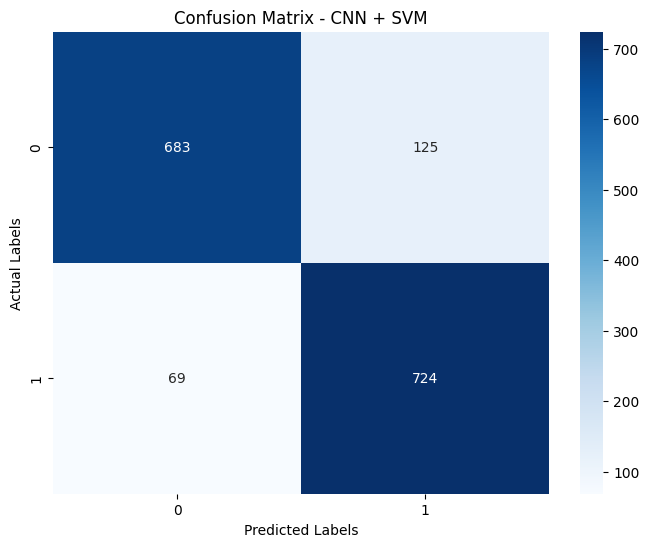

In [103]:
conf_matrix_cnn_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

plt.title('Confusion Matrix - CNN + SVM')
plt.show()

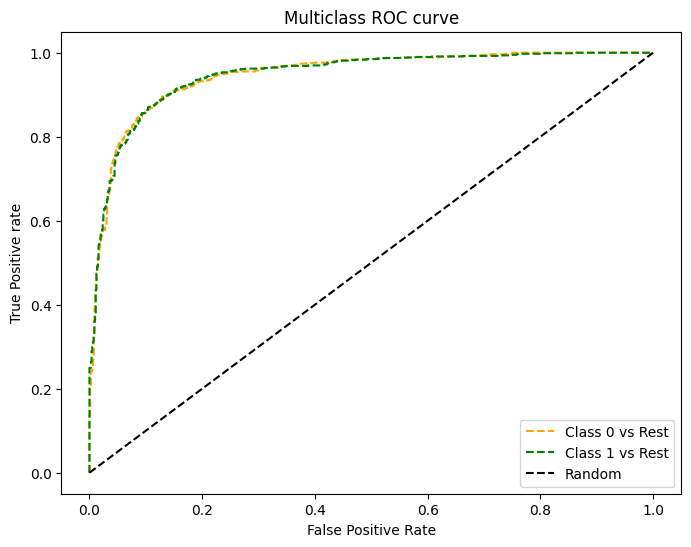

In [104]:
y_pred_proba = svm_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc="best")
plt.show()

### CNN + KNN

In [105]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_features, y_train)

KNeighborsClassifier()

In [106]:
y_pred = knn_model.predict(X_test_features)

accuracy_cnn_knn = accuracy_score(y_test, y_pred)
precision_cnn_knn = precision_score(y_test, y_pred)
recall_cnn_knn = recall_score(y_test, y_pred)
f1_cnn_knn = f1_score(y_test, y_pred)
mathews_cnn_knn = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_knn = roc_auc_score(y_test, y_pred)

In [107]:
print("KNN Accuracy:", accuracy_cnn_knn)
print("KNN Precision:", precision_cnn_knn)
print("KNN Recall:", recall_cnn_knn)
print("KNN F1 Score:", f1_cnn_knn)
print("KNN Mathews Correlation Coefficient:", mathews_cnn_knn)
print("KNN ROC AUC Score:", roc_auc_cnn_knn)

KNN Accuracy: 0.820737039350406
KNN Precision: 0.7868480725623582
KNN Recall: 0.8751576292559899
KNN F1 Score: tf.Tensor(0.8286567, shape=(), dtype=float32)
KNN Mathews Correlation Coefficient: 0.6458119809625941
KNN ROC AUC Score: 0.8212421809646286


In [108]:
classificationReport_cnn_knn = classification_report(y_test, y_pred)
print(classificationReport_cnn_knn)

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       808
           1       0.79      0.88      0.83       793

    accuracy                           0.82      1601
   macro avg       0.82      0.82      0.82      1601
weighted avg       0.82      0.82      0.82      1601



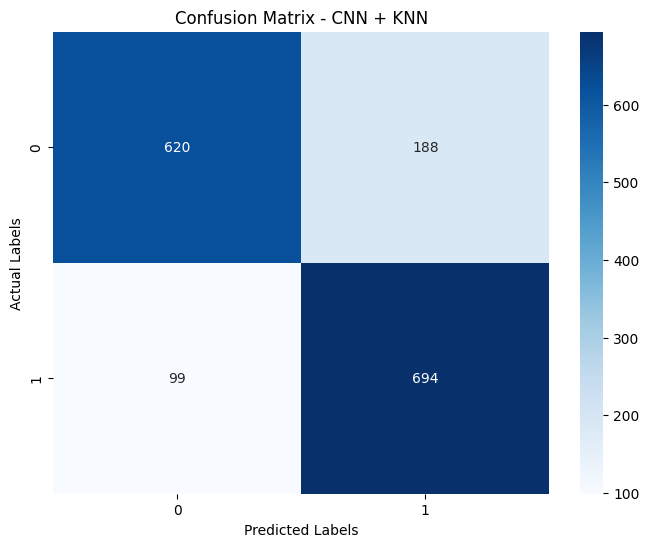

In [109]:
conf_matrix_cnn_knn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + KNN')
plt.show()

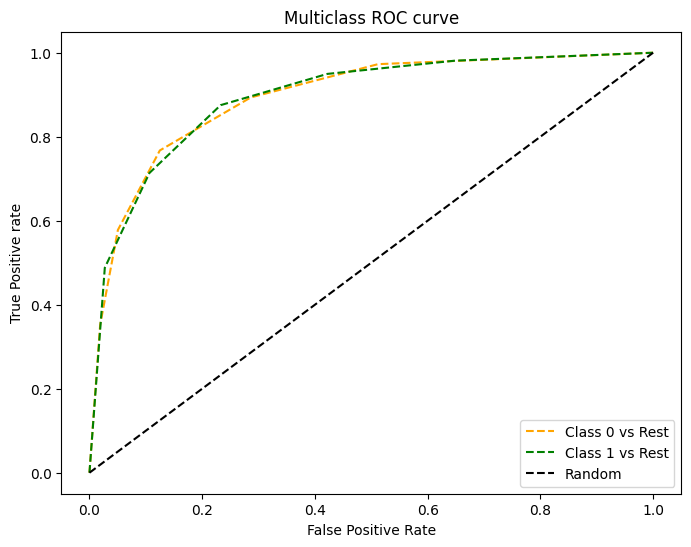

In [110]:
y_pred_proba = knn_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc="best")
plt.show()

### CNN + Naive Bayes

In [111]:
nb_model = GaussianNB()
nb_model.fit(X_train_features, y_train) 

GaussianNB()

In [112]:
y_pred = nb_model.predict(X_test_features)

In [113]:
accuracy_cnn_nb = accuracy_score(y_test, y_pred)
precision_cnn_nb = precision_score(y_test, y_pred)
recall_cnn_nb = recall_score(y_test, y_pred)
f1_cnn_nb = f1_score(y_test, y_pred)
mathews_cnn_nb = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_nb = roc_auc_score(y_test, y_pred)

In [114]:
print("Naive Bayes Accuracy:", accuracy_cnn_nb)
print("Naive Bayes Precision:", precision_cnn_nb)
print("Naive Bayes Recall:", recall_cnn_nb)
print("Naive Bayes F1 Score:", f1_cnn_nb)
print("Naive Bayes Mathews Correlation Coefficient:", mathews_cnn_nb)
print("Naive Bayes ROC AUC Score:", roc_auc_cnn_nb)

Naive Bayes Accuracy: 0.6783260462211118
Naive Bayes Precision: 0.7747035573122529
Naive Bayes Recall: 0.4943253467843632
Naive Bayes F1 Score: tf.Tensor(0.60354114, shape=(), dtype=float32)
Naive Bayes Mathews Correlation Coefficient: 0.37986143690959634
Naive Bayes ROC AUC Score: 0.6766181189367361


In [115]:
classificationReport_cnn_nb = classification_report(y_test, y_pred)
print(classificationReport_cnn_nb)

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       808
           1       0.77      0.49      0.60       793

    accuracy                           0.68      1601
   macro avg       0.70      0.68      0.67      1601
weighted avg       0.70      0.68      0.67      1601



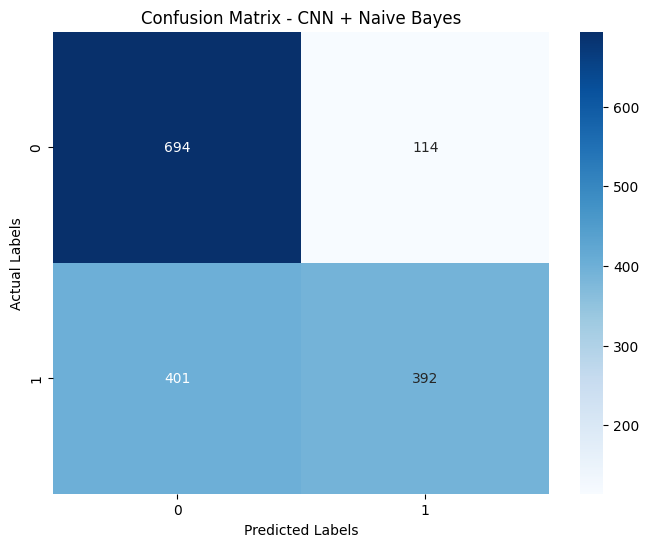

In [116]:
conf_matrix_cnn_nb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_nb, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Naive Bayes')
plt.show()

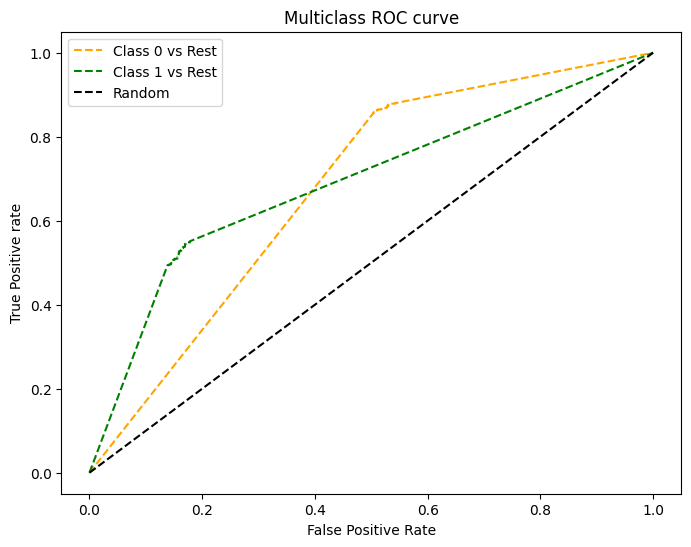

In [117]:
y_pred_proba = nb_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

plt.legend(loc="best")
plt.show()

### CNN + Decision Tree

In [118]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_features, y_train)

DecisionTreeClassifier()

In [119]:
y_pred = dt_model.predict(X_test_features)

In [120]:
accuracy_cnn_dt = accuracy_score(y_test, y_pred)
precision_cnn_dt = precision_score(y_test, y_pred)
recall_cnn_dt = recall_score(y_test, y_pred)
f1_cnn_dt = f1_score(y_test, y_pred)
mathews_cnn_dt = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_dt = roc_auc_score(y_test, y_pred)

In [121]:
print("Decision Tree Accuracy:", accuracy_cnn_dt)
print("Decision Tree Precision:", precision_cnn_dt)
print("Decision Tree Recall:", recall_cnn_dt)
print("Decision Tree F1 Score:", f1_cnn_dt)
print("Decision Tree Mathews Correlation Coefficient:", mathews_cnn_dt)
print("Decision Tree ROC AUC Score:", roc_auc_cnn_dt)

Decision Tree Accuracy: 0.749531542785759
Decision Tree Precision: 0.733890214797136
Decision Tree Recall: 0.7755359394703657
Decision Tree F1 Score: tf.Tensor(0.7541385, shape=(), dtype=float32)
Decision Tree Mathews Correlation Coefficient: 0.5000729264896984
Decision Tree ROC AUC Score: 0.7497729202302323


In [122]:
classificationReport_cnn_dt = classification_report(y_test, y_pred)
print(classificationReport_cnn_dt)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       808
           1       0.73      0.78      0.75       793

    accuracy                           0.75      1601
   macro avg       0.75      0.75      0.75      1601
weighted avg       0.75      0.75      0.75      1601



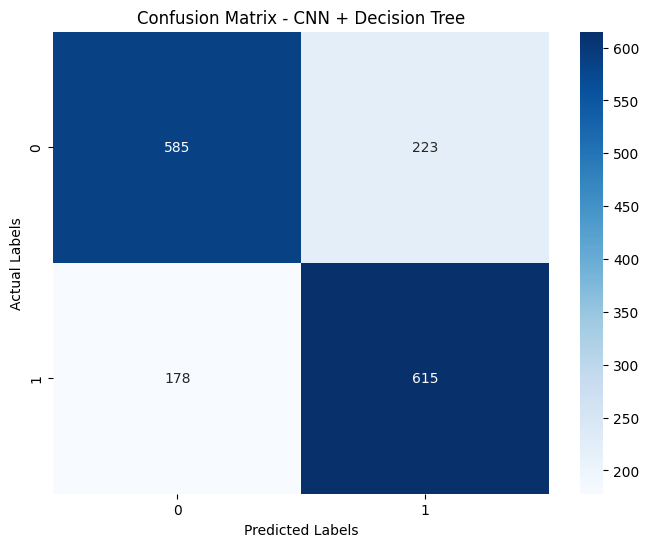

In [123]:
conf_matrix_cnn_dt = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Decision Tree')
plt.show()

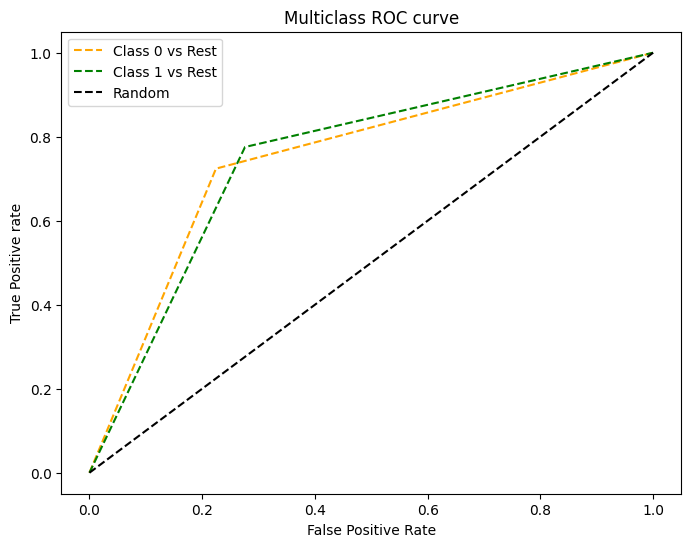

In [124]:
y_pred_proba = dt_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### CNN + Random Forest

In [125]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_features, y_train)

RandomForestClassifier()

In [126]:
y_pred = rf_model.predict(X_test_features)

In [127]:
accuracy_cnn_rf = accuracy_score(y_test, y_pred)
precision_cnn_rf = precision_score(y_test, y_pred)
recall_cnn_rf = recall_score(y_test, y_pred)
f1_cnn_rf = f1_score(y_test, y_pred)
mathews_cnn_rf = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_rf = roc_auc_score(y_test, y_pred)

In [128]:
print("Random Forest Accuracy:", accuracy_cnn_rf)
print("Random Forest Precision:", precision_cnn_rf)
print("Random Forest Recall:", recall_cnn_rf)
print("Random Forest F1 Score:", f1_cnn_rf)
print("Random Forest Mathews Correlation Coefficient:", mathews_cnn_rf) 
print("Random Forest ROC AUC Score:", roc_auc_cnn_rf)

Random Forest Accuracy: 0.8438475952529669
Random Forest Precision: 0.838107098381071
Random Forest Recall: 0.8486759142496847
Random Forest F1 Score: tf.Tensor(0.8433583, shape=(), dtype=float32)
Random Forest Mathews Correlation Coefficient: 0.6877579913126514
Random Forest ROC AUC Score: 0.8438924125703869


In [129]:
classificationReport_cnn_rf = classification_report(y_test, y_pred)
print(classificationReport_cnn_rf)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       808
           1       0.84      0.85      0.84       793

    accuracy                           0.84      1601
   macro avg       0.84      0.84      0.84      1601
weighted avg       0.84      0.84      0.84      1601



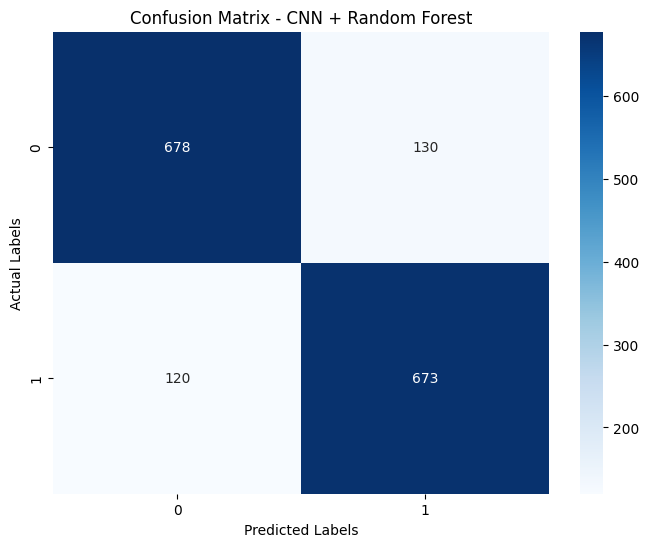

In [130]:
conf_matrix_cnn_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_rf, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + Random Forest')
plt.show()

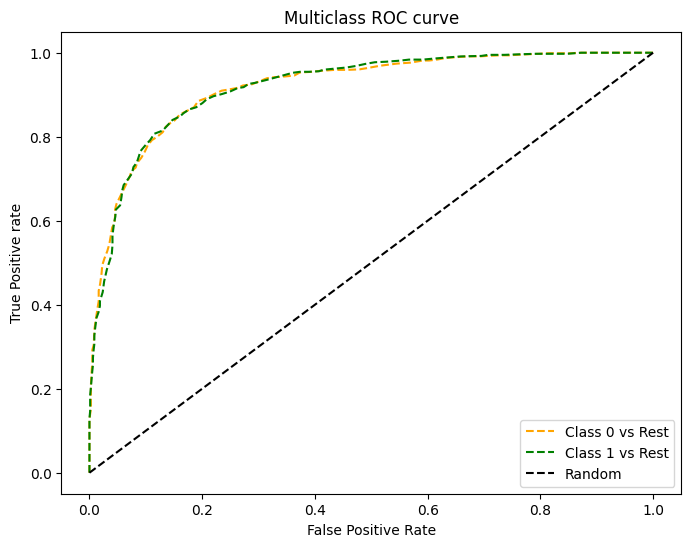

In [131]:
y_pred_proba = rf_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### CNN + XGBoost

In [132]:
xgb_model = XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train_features, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
y_pred = xgb_model.predict(X_test_features)

In [134]:
accuracy_cnn_xgb = accuracy_score(y_test, y_pred)
precision_cnn_xgb = precision_score(y_test, y_pred)
recall_cnn_xgb = recall_score(y_test, y_pred)
f1_cnn_xgb = f1_score(y_test, y_pred)
mathews_cnn_xgb = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_xgb = roc_auc_score(y_test, y_pred)

In [135]:
print("XGBoost Accuracy:", accuracy_cnn_xgb)
print("XGBoost Precision:", precision_cnn_xgb)
print("XGBoost Recall:", recall_cnn_xgb)
print("XGBoost F1 Score:", f1_cnn_xgb)
print("XGBoost Mathews Correlation Coefficient:", mathews_cnn_xgb)
print("XGBoost ROC AUC Score:", roc_auc_cnn_xgb)

XGBoost Accuracy: 0.8775765146783261
XGBoost Precision: 0.8662576687116564
XGBoost Recall: 0.8902900378310215
XGBoost F1 Score: tf.Tensor(0.8781094, shape=(), dtype=float32)
XGBoost Mathews Correlation Coefficient: 0.7554798413150091
XGBoost ROC AUC Score: 0.8776945238660058


In [136]:
classificationReport_cnn_xgb = classification_report(y_test, y_pred)
print(classificationReport_cnn_xgb)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       808
           1       0.87      0.89      0.88       793

    accuracy                           0.88      1601
   macro avg       0.88      0.88      0.88      1601
weighted avg       0.88      0.88      0.88      1601



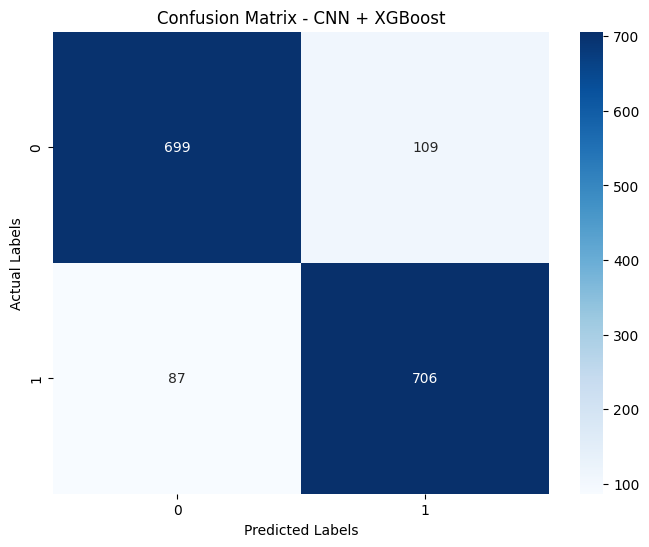

In [137]:
conf_matrix_cnn_xgb = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + XGBoost')
plt.show()

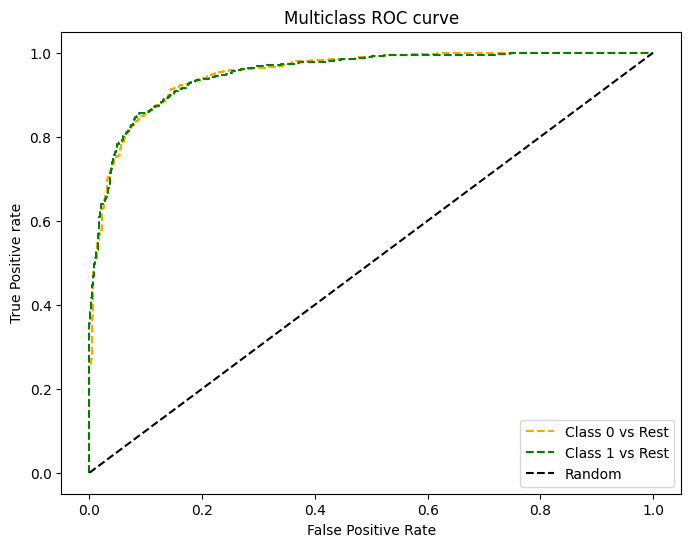

In [138]:
y_pred_proba = xgb_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### CNN + CatBoost

In [139]:
cat_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss')
cat_model.fit(X_train_features, y_train)

0:	learn: 0.6442818	total: 5.87s	remaining: 1h 37m 48s
1:	learn: 0.6056387	total: 13.2s	remaining: 1h 49m 30s
2:	learn: 0.5777396	total: 20.5s	remaining: 1h 53m 37s
3:	learn: 0.5555179	total: 27.4s	remaining: 1h 53m 33s
4:	learn: 0.5330847	total: 34.1s	remaining: 1h 53m
5:	learn: 0.5143750	total: 40.9s	remaining: 1h 53m 2s
6:	learn: 0.4982939	total: 48.6s	remaining: 1h 55m
7:	learn: 0.4840197	total: 56.3s	remaining: 1h 56m 27s
8:	learn: 0.4712347	total: 1m 3s	remaining: 1h 55m 43s
9:	learn: 0.4617717	total: 1m 10s	remaining: 1h 55m 46s
10:	learn: 0.4511133	total: 1m 17s	remaining: 1h 55m 44s
11:	learn: 0.4418318	total: 1m 23s	remaining: 1h 54m 59s
12:	learn: 0.4338095	total: 1m 30s	remaining: 1h 54m 33s
13:	learn: 0.4257437	total: 1m 37s	remaining: 1h 54m 12s
14:	learn: 0.4188046	total: 1m 44s	remaining: 1h 54m 25s
15:	learn: 0.4123711	total: 1m 52s	remaining: 1h 55m 17s
16:	learn: 0.4069995	total: 2m 2s	remaining: 1h 57m 56s
17:	learn: 0.4014716	total: 2m 9s	remaining: 1h 57m 19s
18:	

In [140]:
y_pred = cat_model.predict(X_test_features)

In [141]:
accuracy_cnn_cat = accuracy_score(y_test, y_pred)
precision_cnn_cat = precision_score(y_test, y_pred)
recall_cnn_cat = recall_score(y_test, y_pred)
f1_cnn_cat = f1_score(y_test, y_pred)
mathews_cnn_cat = matthews_corrcoef(y_test, y_pred)
roc_auc_cnn_cat = roc_auc_score(y_test, y_pred)

In [142]:
print("CatBoost Accuracy:", accuracy_cnn_cat)
print("CatBoost Precision:", precision_cnn_cat)
print("CatBoost Recall:", recall_cnn_cat)
print("CatBoost F1 Score:", f1_cnn_cat)
print("CatBoost Mathews Correlation Coefficient:", mathews_cnn_cat)
print("CatBoost ROC AUC Score:", roc_auc_cnn_cat)

CatBoost Accuracy: 0.8938163647720175
CatBoost Precision: 0.8803418803418803
CatBoost Recall: 0.9092055485498108
CatBoost F1 Score: tf.Tensor(0.8945409, shape=(), dtype=float32)
CatBoost Mathews Correlation Coefficient: 0.788094324827171
CatBoost ROC AUC Score: 0.8939592099184698


In [143]:
classificationReport_cnn_cat = classification_report(y_test, y_pred)
print(classificationReport_cnn_cat)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       808
           1       0.88      0.91      0.89       793

    accuracy                           0.89      1601
   macro avg       0.89      0.89      0.89      1601
weighted avg       0.89      0.89      0.89      1601



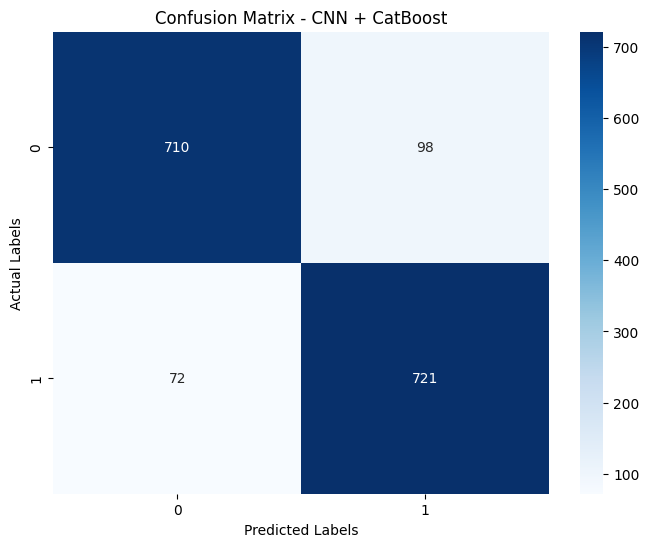

In [144]:
conf_matrix_cnn_cat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn_cat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - CNN + CatBoost')
plt.show()

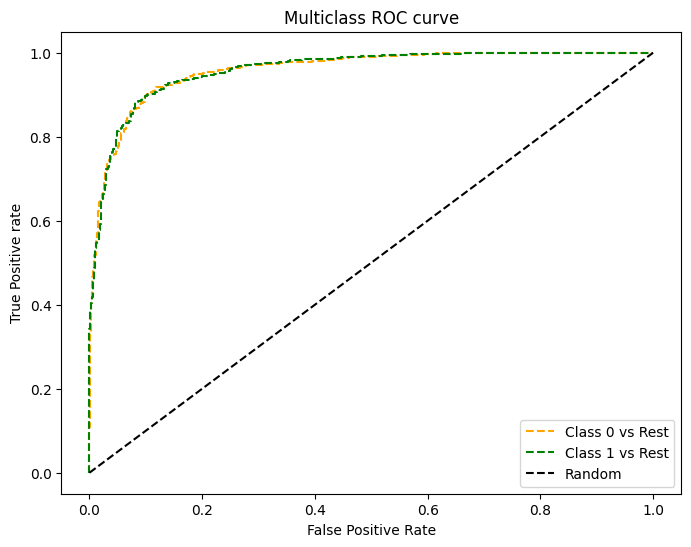

In [145]:
y_pred_proba = cat_model.predict_proba(X_test_features)

fpr = {}
tpr = {}
thresh = {}

n_class = 2

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)

plt.figure(figsize=(8, 6))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot([0,1], [0,1], 'k--', label='Random')

plt.title("Multiclass ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
plt.legend(loc="best")
plt.show()

### Comparison

In [158]:
evaluation_metrics = pd.DataFrame({
    'Model': [ 'CNN + Logistic Regression', 'CNN + SVM', 'CNN + KNN', 'CNN + Naive Bayes', 'CNN + Decision Tree', 'CNN + Random Forest', 'CNN + XGBoost', 'CNN + CatBoost'],
    'Accuracy': [accuracy_cnn_lr, accuracy_cnn_svm, accuracy_cnn_knn, accuracy_cnn_nb, accuracy_cnn_dt, accuracy_cnn_rf, accuracy_cnn_xgb, accuracy_cnn_cat],
    'Precision': [precision_cnn_lr, precision_cnn_svm, precision_cnn_knn, precision_cnn_nb, precision_cnn_dt, precision_cnn_rf, precision_cnn_xgb, precision_cnn_cat],
    'Recall': [recall_cnn_lr, recall_cnn_svm, recall_cnn_knn, recall_cnn_nb, recall_cnn_dt, recall_cnn_rf, recall_cnn_xgb, recall_cnn_cat],
    'F1 Score': [f1_cnn_lr.numpy(), f1_cnn_svm.numpy(), f1_cnn_knn.numpy(), f1_cnn_nb.numpy(), f1_cnn_dt.numpy(), f1_cnn_rf.numpy(), f1_cnn_xgb.numpy(), f1_cnn_cat.numpy()],
    'Mathews Correlation Coefficient': [mathews_cnn_lr, mathews_cnn_svm, mathews_cnn_knn, mathews_cnn_nb, mathews_cnn_dt, mathews_cnn_rf, mathews_cnn_xgb, mathews_cnn_cat],
    'ROC AUC Score': [roc_auc_cnn_lr, roc_auc_cnn_svm, roc_auc_cnn_knn, roc_auc_cnn_nb, roc_auc_cnn_dt, roc_auc_cnn_rf, roc_auc_cnn_xgb, roc_auc_cnn_cat]

})

In [159]:
best_models = {
    'Accuracy': evaluation_metrics.loc[evaluation_metrics['Accuracy'].idxmax(), 'Model'],
    'Precision': evaluation_metrics.loc[evaluation_metrics['Precision'].idxmax(), 'Model'],
    'Recall': evaluation_metrics.loc[evaluation_metrics['Recall'].idxmax(), 'Model'],
    'F1 Score': evaluation_metrics.loc[evaluation_metrics['F1 Score'].idxmax(), 'Model'],
    'Mathews Correlation Coefficient': evaluation_metrics.loc[evaluation_metrics['Mathews Correlation Coefficient'].idxmax(), 'Model'],
    'ROC AUC Score': evaluation_metrics.loc[evaluation_metrics['ROC AUC Score'].idxmax(), 'Model']
}

transposed_metrics = evaluation_metrics.set_index('Model').transpose()

transposed_metrics['Best Model'] = transposed_metrics.apply(lambda x: best_models[x.name], axis=1)

transposed_metrics

Model,CNN + Logistic Regression,CNN + SVM,CNN + KNN,CNN + Naive Bayes,CNN + Decision Tree,CNN + Random Forest,CNN + XGBoost,CNN + CatBoost,Best Model
Accuracy,0.890069,0.878826,0.820737,0.678326,0.749532,0.843848,0.877577,0.893816,CNN + CatBoost
Precision,0.874848,0.852768,0.786848,0.774704,0.733890,0.838107,0.866258,0.880342,CNN + CatBoost
Recall,0.907945,0.912989,0.875158,0.494325,0.775536,0.848676,0.890290,0.909206,CNN + SVM
F1 Score,0.891089,0.881851,0.828657,0.603541,0.754139,0.843358,0.878109,0.894541,CNN + CatBoost
Mathews Correlation Coefficient,0.780743,0.759648,0.645812,0.379861,0.500073,0.687758,0.755480,0.788094,CNN + CatBoost
ROC AUC Score,0.890235,0.879143,0.821242,0.676618,0.749773,0.843892,0.877695,0.893959,CNN + CatBoost
